In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
n=100  # spatial grid size.
M=5    # number of electrons injected per turn.
nk=5000 # number of turns to simulate.
u0=5   # threshold velocity.
p=0.25 # probability that ionization will occur
M_sig= 2 # standard dev

In [70]:
xx = np.zeros(n*M)
u = np.zeros(n*M)
dx = np.zeros(n*M)

In [71]:
I = []
X = []
V = []

In [72]:
for k in range(nk):
    N = int(M_sig*np.random.randn() + M)
    # Injection
    start = np.where(xx==0)
    xx[start[0][:N]] = 1
    # Propagation : Compute and Update position and velocity
    ii = np.where(xx>0)
    X.extend(xx[ii].tolist())
    V.extend(u[ii].tolist())
    dx[ii] = u[ii] + 0.5
    u[ii] +=1
    xx[ii] += dx[ii]
    # Reset e- which reached end of grid
    end = np.where(xx>=n)
    xx[end] = 0
    u[end] = 0
    dx[end] = 0
    # Threshold 
    kk = np.where(u>= u0)
    ll = np.where(np.random.rand(len(kk[0]))<=p)
    kl = kk[0][ll]
    # position update of ionized e-
    # dt is uniformly sampled between [0,1] and xx is recorrected by using dt
    dt = np.random.rand()
    xx[kl] = (xx[kl] - dx[kl]) + (u[kl]-1)*dt + 0.5*dt**2
    # Velocity update of ionized e-
    u[kl] = 0
    I.extend(xx[kl].tolist())

In [73]:
I[:10]

[10.70065492842745,
 18.233487345045766,
 17.751585286602335,
 17.751585286602335,
 32.45765944022514,
 18.59382397959958,
 13.161906249286798,
 13.161906249286798,
 41.441567242935236,
 13.467546731266989]

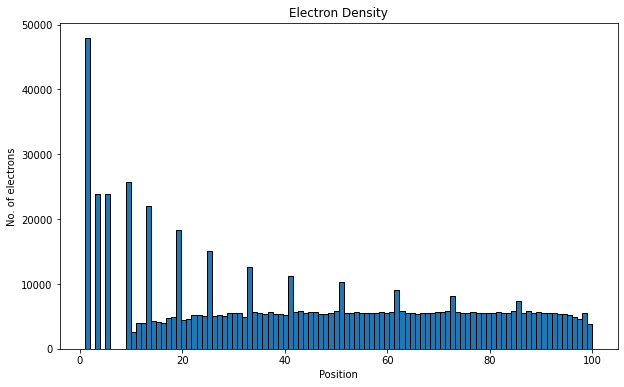

In [74]:
fig, ax = plt.subplots(num=0,figsize=(10, 6))
plt.hist(X,bins=n,edgecolor='black')
plt.xlabel('Position')
plt.ylabel('No. of electrons')
plt.title(r'Electron Density');

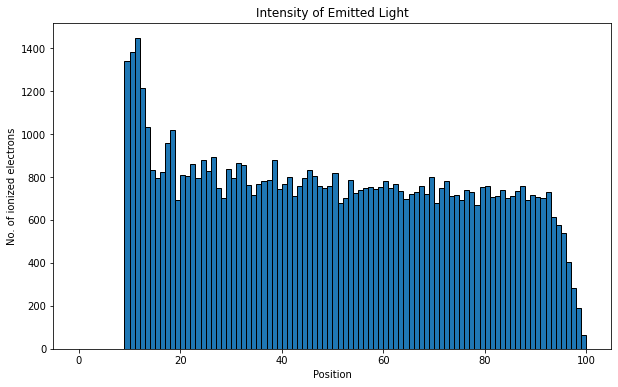

In [75]:
fig, ax = plt.subplots(num=1,figsize=(10, 6))
count, bins, rect =plt.hist(I,bins=n,range=[0,n],edgecolor='black')
plt.xlabel('Position')
plt.ylabel('No. of ionized electrons')
plt.title(r'Intensity of Emitted Light');

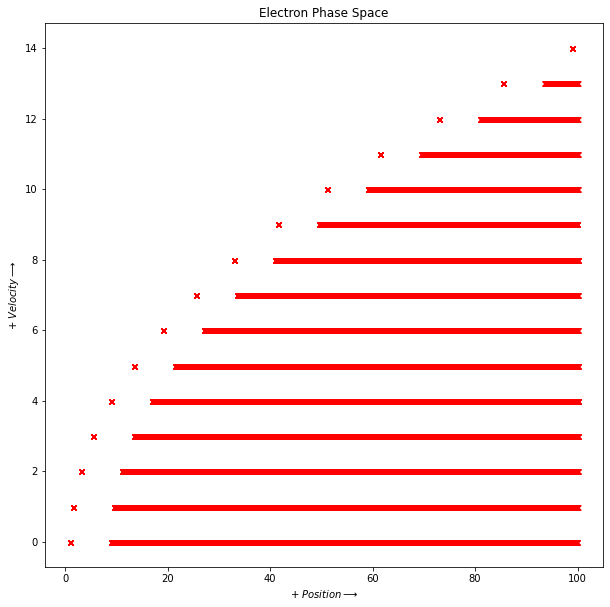

In [76]:
fig, ax = plt.subplots(num=2,figsize=(10,10))
plt.plot(X,V,'rx',markersize =5)
plt.xlabel(r'+ $Position\longrightarrow$')
plt.ylabel(r'+ $Velocity\longrightarrow$')
plt.title('Electron Phase Space');

In [30]:
xpos=0.5*(bins[0:-1]+bins[1:])
print('Intensity Data')
print('xpos','\t','count')
for i in range(n):
    print(xpos[i],'\t',count[i])

Intensity Data
xpos 	 count
0.5 	 0.0
1.5 	 0.0
2.5 	 0.0
3.5 	 0.0
4.5 	 0.0
5.5 	 0.0
6.5 	 0.0
7.5 	 0.0
8.5 	 0.0
9.5 	 0.0
10.5 	 0.0
11.5 	 0.0
12.5 	 0.0
13.5 	 0.0
14.5 	 0.0
15.5 	 0.0
16.5 	 0.0
17.5 	 0.0
18.5 	 0.0
19.5 	 0.0
20.5 	 0.0
21.5 	 0.0
22.5 	 0.0
23.5 	 0.0
24.5 	 0.0
25.5 	 0.0
26.5 	 0.0
27.5 	 0.0
28.5 	 0.0
29.5 	 0.0
30.5 	 0.0
31.5 	 0.0
32.5 	 0.0
33.5 	 0.0
34.5 	 0.0
35.5 	 0.0
36.5 	 0.0
37.5 	 0.0
38.5 	 0.0
39.5 	 0.0
40.5 	 0.0
41.5 	 59.0
42.5 	 146.0
43.5 	 118.0
44.5 	 111.0
45.5 	 154.0
46.5 	 138.0
47.5 	 111.0
48.5 	 107.0
49.5 	 88.0
50.5 	 129.0
51.5 	 108.0
52.5 	 80.0
53.5 	 58.0
54.5 	 73.0
55.5 	 76.0
56.5 	 118.0
57.5 	 72.0
58.5 	 79.0
59.5 	 81.0
60.5 	 81.0
61.5 	 73.0
62.5 	 76.0
63.5 	 55.0
64.5 	 32.0
65.5 	 65.0
66.5 	 52.0
67.5 	 63.0
68.5 	 70.0
69.5 	 43.0
70.5 	 67.0
71.5 	 53.0
72.5 	 59.0
73.5 	 41.0
74.5 	 46.0
75.5 	 42.0
76.5 	 26.0
77.5 	 49.0
78.5 	 43.0
79.5 	 47.0
80.5 	 38.0
81.5 	 36.0
82.5 	 41.0
83.5 	 41.0
84.5 

In [37]:
with open('data.txt','w+') as f:
    print("Intensity Data",file=f)
    print(tabulate(np.stack((xpos,count)).T,["xpos","count"]),file=f)

In [39]:
import argparse

In [47]:
parser = argparse.ArgumentParser()
parser.add_argument('bar')
parser.parse_args(['XXX'])

Namespace(bar='XXX')